# Kernel Density Estimation

In [1]:
import numpy as np
from numpy.random import randn
import pandas as pd 

from scipy import stats

import matplotlib as mlp
import matplotlib.pyplot as plt

import seaborn as sns

# Command so that plots appear in the iPython Notebook
%matplotlib inline

## rugplot

(0, 0.5)

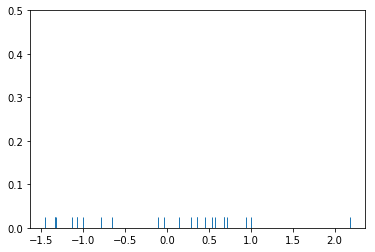

In [2]:
# A rug plot simpot puts ticks wherever a value occured
data = randn(25)

# Create rugplot
sns.rugplot(data)

#Set y-axis limit
plt.ylim(0,0.5)

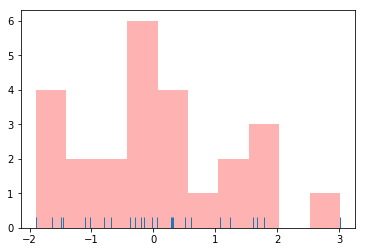

In [4]:
# plot histogram
plt.hist(data,color = 'red',alpha = 0.3)
sns.rugplot(data)

The histogram sets up 10 bins and then just count how many ticks appeared in each bin, setting the height of each bar

The kernel density plot will represent each tick mark with a gaussian basis function. Let's see how we would do this manually

resource : http://en.wikipedia.org/wiki/Kernel_density_estimation#Practical_estimation_of_the_bandwidth

(0, 1)

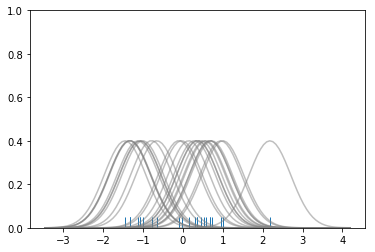

In [4]:
# Create another rugplot
sns.rugplot(data)

# Set up the x-axis for the plot
x_min = data.min() - 2
x_max = data.max() + 2

# 100 equally spaced points from x_min to x_max
x_axis = np.linspace(x_min,x_max,100)

# Set up the bandwidth, for info on 'url'
bandwidth = ((4*data.std()**5)/(3*len(data)))**.2


# Create an empty kernel list
kernel_list = []

# Plot each basis function
for data_point in data:
    
    # Create a kernel for each point and append to list
    kernel = stats.norm(data_point,bandwidth).pdf(x_axis)
    kernel_list.append(kernel)
    
    # Scale for plotting
    kernel = kernel / kernel.max()
    kernel = kernel * .4
    plt.plot(x_axis,kernel,color = 'grey',alpha=0.5)

plt.ylim(0,1)

Text(0.5, 0.98, 'Sum of the Basis Functions')

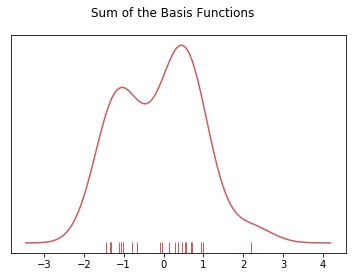

In [5]:
# To get the kde plot we can sum these basis functions.

# Plot the sum of the basis function
sum_of_kde = np.sum(kernel_list,axis=0)

# Plot figure
fig = plt.plot(x_axis,sum_of_kde,color='indianred')

# Add the initial rugplot
sns.rugplot(data,c = 'indianred')

# Get rid of y-tick marks
plt.yticks([])

# Set title
plt.suptitle("Sum of the Basis Functions")

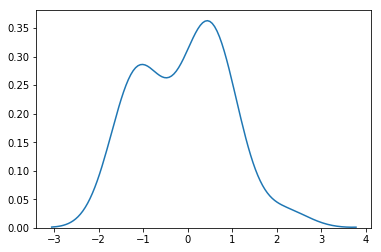

In [7]:
sns.kdeplot(data)

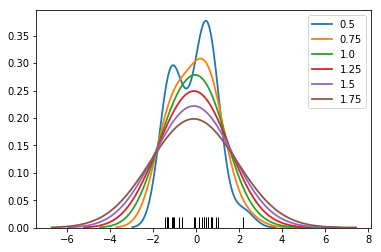

In [8]:
# We can adjust the bandwidth of the sns kde to make the kde plot more or less sensitive to high frequency

# Rugplot
sns.rugplot(data,color='black')

# Plot various bandwidths
for bw in np.arange(0.5,2,0.25):
    sns.kdeplot(data,bw=bw,lw=1.8,label=bw)

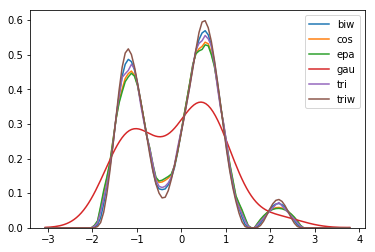

In [9]:
# We can also choose different kernels

kernel_options = ["biw", "cos", "epa", "gau", "tri", "triw"]

# More info on types
url = 'http://en.wikipedia.org/wiki/Kernel_(statistics)'

# Use label to set legend
for kern in kernel_options:
    sns.kdeplot(data,kernel=kern,label=kern)

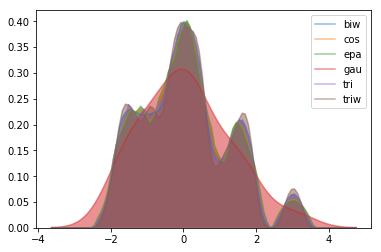

In [27]:
# We can also shade if desired
for kern in kernel_options:
    sns.kdeplot(data,kernel=kern,label=kern,shade=True,alpha=0.5)

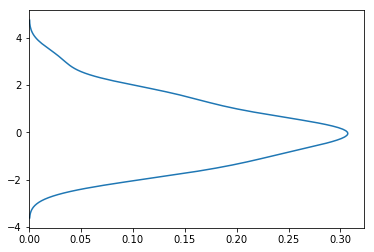

In [28]:
# For vertical axis, use the vertical keyword
sns.kdeplot(data,vertical=True)

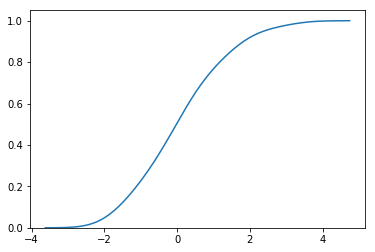

In [29]:
# Finally we can also use kde plot to create a cumulative distribution function (CDF) of the data

# URL for info on CDF
url = 'http://en.wikipedia.org/wiki/Cumulative_distribution_function'

sns.kdeplot(data,cumulative=True)

## Multivariate Density Estimation using kdeplot

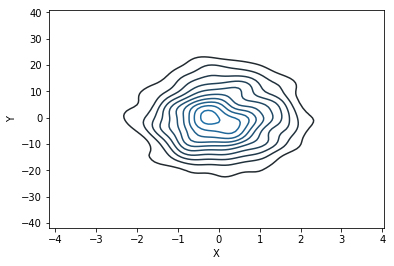

In [30]:
# Let's create a new dataset

# Mean center of data
mean = [0,0]

# Diagonal covariance
cov = [[1,0],[0,100]]

# Create dataset using numpy
dataset2 = np.random.multivariate_normal(mean,cov,1000)

# Bring back our old friend pandas
dframe = pd.DataFrame(dataset2,columns=['X','Y'])

# Plot our dataframe
sns.kdeplot(dframe.X,dframe.Y)

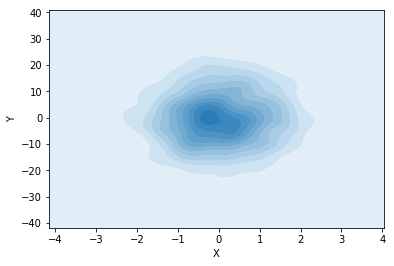

In [33]:
# We could have also passed two vectors seperately, and shade
sns.kdeplot(dframe.X,dframe.Y,shade=True)

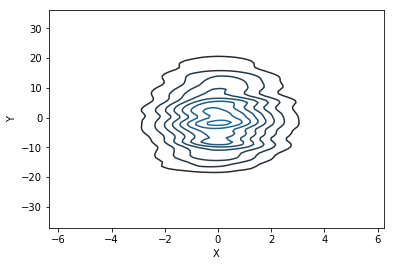

In [34]:
# Can specify a particualr bandwidth
sns.kdeplot(dframe.X,dframe.Y,bw = 1)

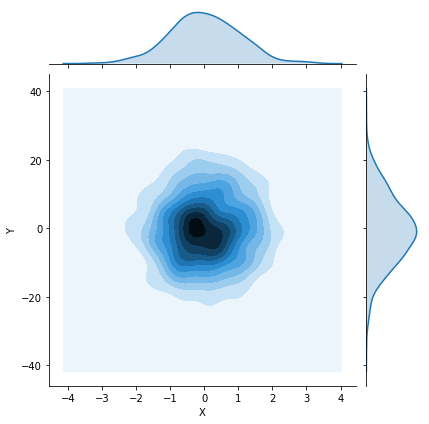

In [35]:
# We can also create a kde joint plot, simliar to the hexbin plots we saw before

sns.jointplot('X','Y',dframe,kind='kde')